<a href="https://colab.research.google.com/github/isaacdavii/Trabalho_IA_MachineLearning/blob/main/Trabalho_IA_Grupo_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho da disciplina de IA

---

### Professora:
*   Isabela Neves Drummond

### Alunos:
* Isaac Davi Mendonça Viana - 2023000650
* Kaio Magno Cezário de Cássio - 2023007650
* Marcos Eduardo Alves de Souza - 2023010155
* Pedro Paulo Araujo Carvalho - 2023000909
* Samuel Guedes Nascimento - 2023012991

---


```
Data da apresentação 18/06/24
```



O conjunto de dados utilizado neste notebook é traz informações sobre apartamentos de Moscou. O objetivo é, a partir dos dados dos apartamentos, definir se ele é um imóvel `novo` ou `não`.

 Atributos dos dados:

- min_metro: Minutos do apartamento até o metrô mais próximo
- area_total: Área construída do imóvel
- area_util: Área utilizável do imóvel
- andar: Andar em que se encontra o imóvel
- pe_direito: Altura do piso ao teto do imóvel
- numero_comodos: Quantidade de cômodos
- novo: Indica se o apartamento é novo (1) ou não (0)

O conjunto de dados foi importado pelo Google Drive e sua carga é feita em um DataFrame Pandas.

Para realizar a classificação dos dados dos apartamentos utilizando o modelo de árvore de decisão, seguiremos os passos abaixo:


1. **Carregar e inspecionar os dados**: Verificar a estrutura dos dados e realizar uma análise exploratória.
2. **Pré-processamento dos dados**: Limpar e transformar os dados conforme necessário.
3. **Divisão dos dados**: Dividir os dados em conjuntos de treinamento e teste.
4. **Treinamento do modelo**: Treinar o modelo de árvore de decisão com os dados de treinamento.
5. **Avaliação do modelo**: Avaliar o desempenho do modelo nos dados de teste.
6. **Interpretação e visualização da árvore**: Analisar a árvore de decisão gerada.
---

## Fazemos a conexão com o Drive a fim de importar os dados para o Jupyter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Modelo de Árvore de Decisão

### Importando as bibliotecas

Inicialmente, realizamos a importação das bibliotecas que utilizaremos no processo. Outras bibliotecas serão inseridas no decorrer dos processos do código.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

A seguir, carregamos o banco de dados para a utilização no programa.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trabalho_IA_Isabela/apartamentos.csv', header = None)
df

,0,1,2,3,4,5,6
0,min_metro,area_total,area_util,andar,novo,pe_direito,numero_comodos
1,24.0,64.2,32.4,11.0,1.0,3.15,2.0
2,5.0,72.4,33.6,3.0,1.0,3.15,2.0
3,27.0,66.9,24.8,9.0,1.0,3.0,2.0
4,20.0,66.0,29.9,8.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...
2981,7.0,178.0,94.0,8.0,0.0,3.0,4.0
2982,7.0,84.0,56.0,2.0,0.0,2.64,4.0
2983,6.0,81.1,57.8,2.0,0.0,3.2,4.0
2984,2.0,163.5,96.0,6.0,0.0,3.0,4.0


### Preparação do Conjunto de Dados

Por se tratar de um aprendizado supervisionado, o objetivo é a identificação de uma classe previamente informada considerando um conjunto de treinamento e um de teste. Para isso, o conjunto é dividido em um conjunto de amostras denominado X, e um de rótulos denominado y.

In [ ]:
df.rename(columns = {0:'min_metro',
                    1:'area_total',
                    2:'area_util',
                    3:'andar',
                    4:'novo',
                    5:'pe_direito',
                    6: 'numero_comodos'}, inplace = True)

#Remover a primeira linha (acaba por repetir as colunas)
#df = df.drop(index = 0)
df.head()

,min_metro,area_total,area_util,andar,novo,pe_direito,numero_comodos
1,24.0,64.2,32.4,11.0,1.0,3.15,2.0
2,5.0,72.4,33.6,3.0,1.0,3.15,2.0
3,27.0,66.9,24.8,9.0,1.0,3.0,2.0
4,20.0,66.0,29.9,8.0,1.0,3.0,2.0
5,5.0,65.55,34.4,26.0,1.0,2.87,2.0


Neste momento nós preparamos os dados para o treinamento do modelo de aprendizado de máquina.

Como queremos definir se o imóvel é NOVO ou NÃO. Faremos com que a coluna "novo" passe de variável para a coluna **alvo**, i.e, aquilo que queremos prever.


In [ ]:
# Selecionar features e target
X = df.drop(columns = ['novo'])
y = df['novo']

### Treinamento do modelo

In [ ]:
# Divisão dos dados em conjuntos de treinamento e teste
# Separamos o treinamento em 70% do conjunto original

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Quantidade de amostras de treinamento:", X_treino.shape[0])
print("Quantidade de amostras de teste:", X_teste.shape[0])

Quantidade de amostras de treinamento: 2089
Quantidade de amostras de teste: 896


In [ ]:
# Treinamento do modelo

#Instanciando o Classificador de Árvore de Decisão
clf = DecisionTreeClassifier(random_state = 42)
#clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=10, random_state=42)

# Treinando o Modelo
clf.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=42)

**Mudando os parâmetros**

Quando mudamos os parâmetros utilizando a linha de código:
`clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_split = 10, random_state = 42)`

Nós temos uma variação na acurácia de 0.85 para 0.77. Esta diferença influencia na classificação final dos dados.

```
Acurácia: 0.77

Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84       580
         1.0       0.83      0.42      0.56       316

    accuracy                           0.77       896
   macro avg       0.79      0.69      0.70       896
weighted avg       0.78      0.77      0.74       896
```



Durante o treinamento, o classificador de árvore de decisão realiza as seguintes etapas:

1. **Divisão Recursiva**: O algoritmo começa com todo o conjunto de treinamento e tenta dividir os dados em dois grupos de forma que a pureza dos grupos resultantes seja maximizada. A pureza é geralmente medida por critérios como Gini impurity ou entropia.
2. **Critério de Divisão**: Para cada divisão possível, o algoritmo calcula um critério de divisão (por exemplo, redução da impureza de Gini) e escolhe a divisão que maximiza a separação dos dados de acordo com os valores alvo.
3. **Criação de Nós**: A árvore é construída de forma recursiva, com cada nó de decisão representando uma pergunta sobre uma característica. Cada folha na árvore representa uma previsão final (neste caso, se o apartamento é novo ou não).
4. **Parada**: O processo de divisão continua até que todas as folhas sejam puras (ou seja, contenham exemplos de uma única classe) ou outro critério de parada seja alcançado (por exemplo, profundidade máxima da árvore, número mínimo de amostras em uma folha).

**Objetivo das Previsões**: O objetivo desta etapa é usar o modelo treinado (clf) para fazer previsões sobre o conjunto de teste (X_test).

In [ ]:
# Previsões
y_pred = clf.predict(X_teste)

In [ ]:
# Avaliação do modelo - Conforme requisitado pela Etapa 3 do trabalho
accuracy = accuracy_score(y_teste, y_pred)
classification_rep = classification_report(y_teste, y_pred)

In [ ]:
print(f"Acurácia: {accuracy:.2f}")
print()
print(f"Relatório de classificação:\n{classification_rep}")

Acurácia: 0.85

Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       580
         1.0       0.80      0.77      0.78       316

    accuracy                           0.85       896
   macro avg       0.84      0.83      0.83       896
weighted avg       0.85      0.85      0.85       896



Interpretação dos Resultados:

- **Precisão (Precision)**: A precisão é alta para ambas as classes (0.88 para não novo e 0.80 para novo), indicando que a maioria das previsões positivas são corretas. Aqui vemos quantas das previsões positivas são realmente positivas.
- **Revocação (Recall)**: A revocação é igualmente alta (0.89 para não novo e 0.77 para novo), mostrando que o modelo está capturando bem os exemplos das classes. Aqui vemos quantas das instâncias positivas foram corretamente identificadas.
- **F1-Score**: O F1-score é um balanço entre precisão e recall e também é alto, especialmente para a classe não novo (0.88) e aceitável para a classe novo (0.78).
- **Acurácia Global**: A acurácia global de 0.8482 indica que o modelo está classificando corretamente cerca de 85% das instâncias.



### Visualização final dos dados

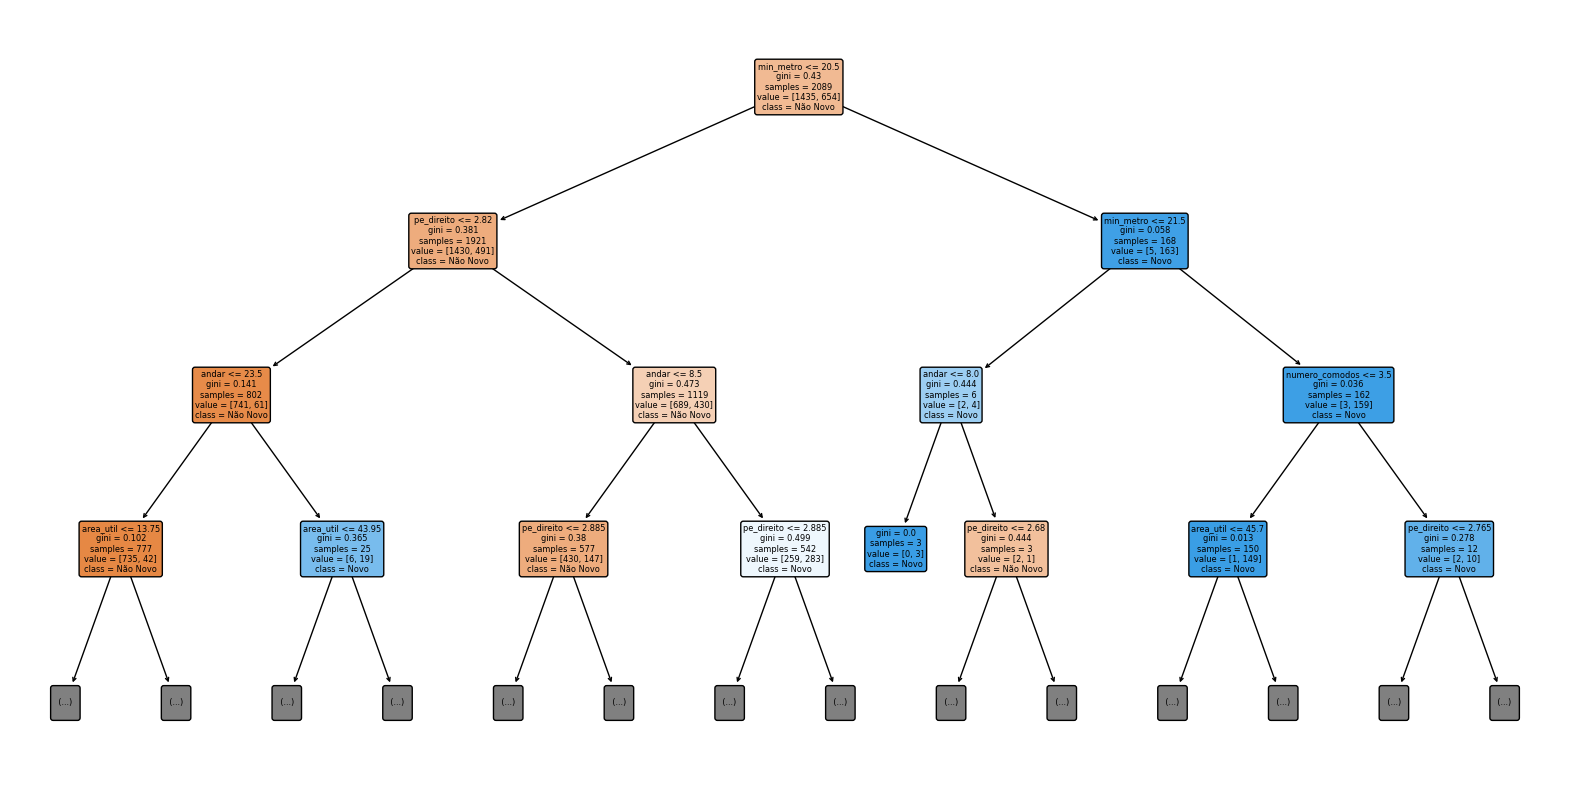

In [ ]:
# Visualização da árvore de decisão (simplificada)
plt.figure(figsize = (20,10))
plot_tree(clf, max_depth = 3, filled = True, feature_names = X.columns, class_names = ['Não Novo', 'Novo'], rounded = True)
plt.show()

### Matriz de Confusão

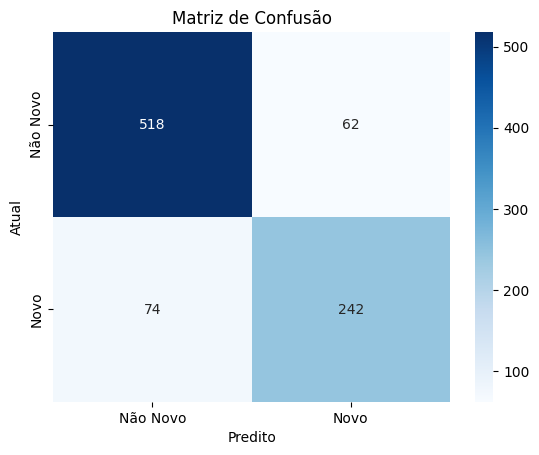

In [ ]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_teste, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = ['Não Novo', 'Novo'], yticklabels = ['Não Novo', 'Novo'])
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de Confusão')
plt.show()

  Pelo nosso resultado temos:

    True Negatives (TN): 518 (apartamentos que não são novos e foram corretamente classificados como não novos)
    False Positives (FP): 62 (apartamentos que não são novos e foram incorretamente classificados como novos)
    False Negatives (FN): 74 (apartamentos que são novos e foram incorretamente classificados como não novos)
    True Positives (TP): 242 (apartamentos que são novos e foram corretamente classificados como novos)


### **Conclusão**

O modelo de árvore de decisão treinado apresenta uma boa performance na classificação dos apartamentos como novos ou não novos, com uma acurácia de aproximadamente 85%. A árvore de decisão gerada oferece uma visão clara das regras usadas para a classificação, o que pode ser útil para entender os fatores que influenciam a percepção de um imóvel como novo.

### Interpretação



#### Acurácia
- **Acurácia de 85%**: O modelo prevê corretamente se um apartamento é novo ou não em 85% dos casos.

#### Precisão e Revocação
- **Classe 0 (apartamentos não novos)**:
  - **Precisão**: 0.88 - 88% das previsões que o modelo fez como "não novo" estão corretas.
  - **Revocação**: 0.89 - 89% dos apartamentos que realmente não são novos foram identificados corretamente.
  - **F1-Score**: 0.88 - Média harmônica entre precisão e revocação para a classe 0.

- **Classe 1 (apartamentos novos)**:
  - **Precisão**: 0.80 - 80% das previsões que o modelo fez como "novo" estão corretas.
  - **Revocação**: 0.77 - 77% dos apartamentos que realmente são novos foram identificados corretamente.
  - **F1-Score**: 0.78 - Média harmônica entre precisão e revocação para a classe 1.

#### Desempenho do Modelo
- **Boa precisão para ambas as classes**: O modelo está razoavelmente correto quando prevê tanto apartamentos novos quanto não novos.
- **Revocação equilibrada**: O modelo consegue identificar a maioria dos apartamentos novos e não novos, embora ainda haja um pouco de tendência em identificar mais corretamente apartamentos não novos.
- **Desempenho Geral**: O modelo apresenta um desempenho equilibrado, com uma acurácia geral de 85%.

### Conclusão
- **Desempenho Melhorado**: Comparado com os resultados anteriores, o modelo agora tem um desempenho muito mais equilibrado entre as classes, sugerindo uma melhoria significativa em termos de precisão e revocação para ambos os tipos de apartamentos.

- **Necessidade de Melhorias Contínuas**:
  - **Refinamento de Dados**: Embora o modelo tenha melhorado, há sempre espaço para melhorar a qualidade das features e equilibrar ainda mais os dados, se necessário.
  - **Modelo Alternativo**: Continuar a explorar outros modelos de classificação pode ser benéfico para ver se ainda há melhorias a serem feitas.
  - **Feature Engineering**: Continuar criando e ajustando features para capturar melhor as características dos apartamentos novos e não novos.

### Próximos Passos
1. **Análise de Balanceamento de Dados**: Verificar se a distribuição das classes ainda está equilibrada e aplicar técnicas adicionais de balanceamento, se necessário.
2. **Exploração de Outros Modelos**: Testar e comparar outros algoritmos de classificação para continuar melhorando o desempenho.
3. **Feature Engineering**: Continuar melhorando a qualidade das features para ajudar na classificação.



### Adendo - Visualização da Árvore e Matriz ao mudar os parâmetros
 Ao realizar a mudança de parâmetros, confome descrito anteriormente, obtemos os seguintes resultados da árvore e da matriz de confusão.

#### Árvore de Decisão


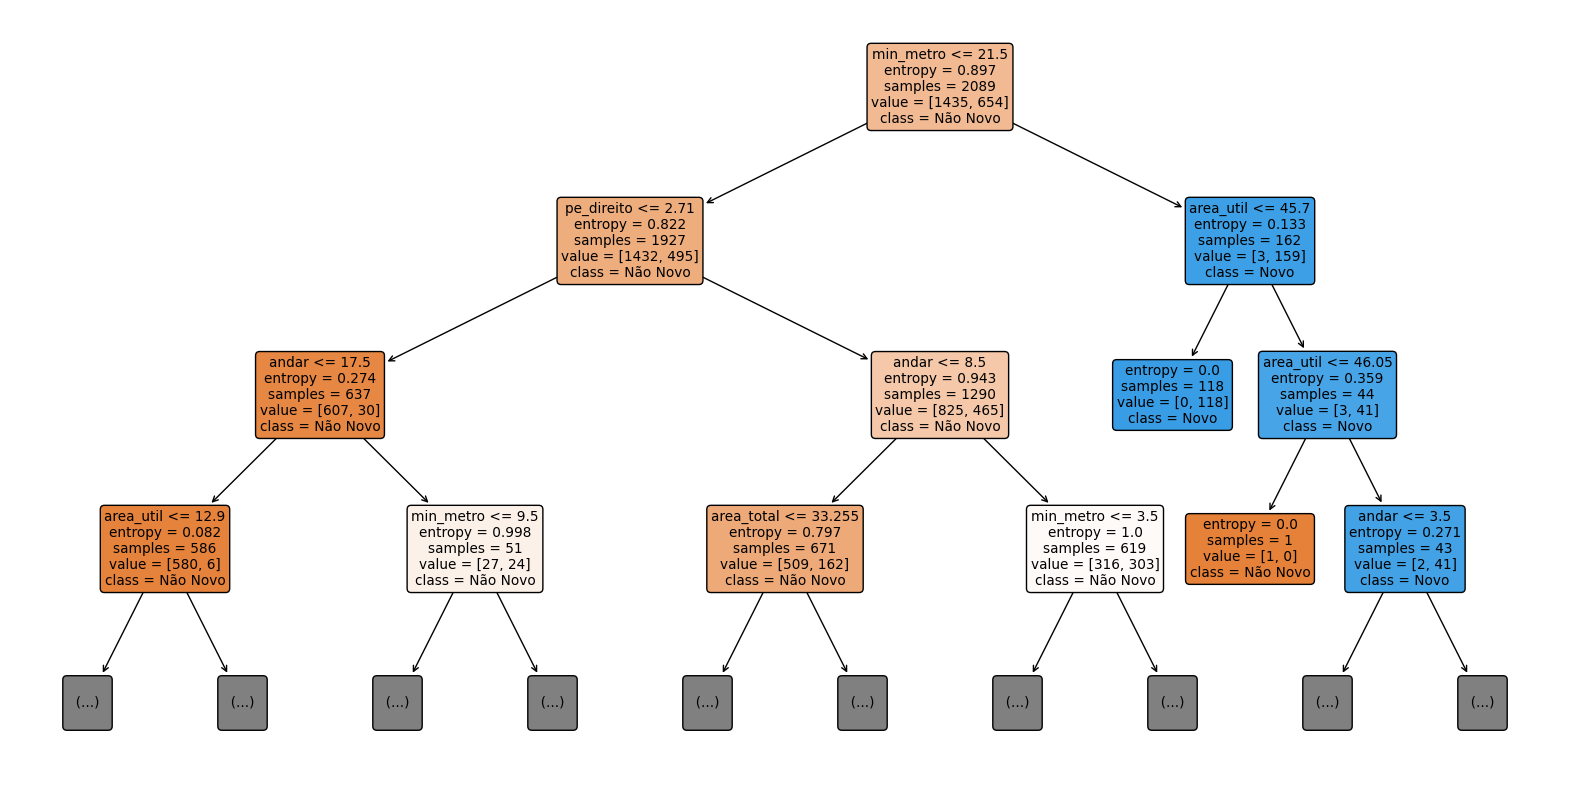

#### Matriz de Confusão


 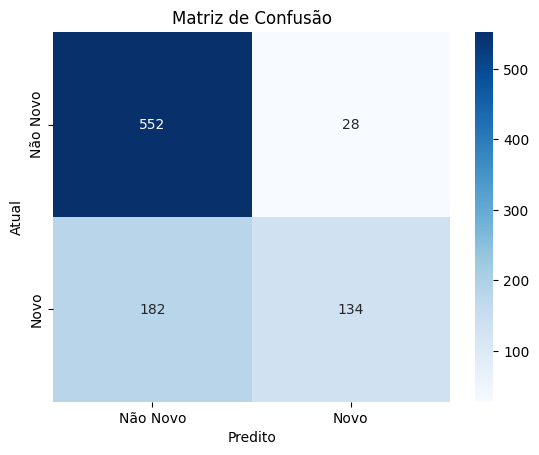